<a href="https://colab.research.google.com/github/aniusoro/Uni/blob/main/Homework9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question 1:

In [1]:
skulldata = read.csv("SkullsComplete.csv")
skulldata = subset(skulldata, select = -c(bh,bl,nh) )
skulldata[1:10, ]

,epoch,mb
,<chr>,<int>
1,c4000BC,131
2,c4000BC,125
3,c4000BC,131
4,c4000BC,119
5,c4000BC,136
6,c4000BC,138
7,c4000BC,139
8,c4000BC,125
9,c4000BC,131


Question 2:


In [2]:
install.packages("plyr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘Rcpp’




In [15]:
install.packages("dplyr")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



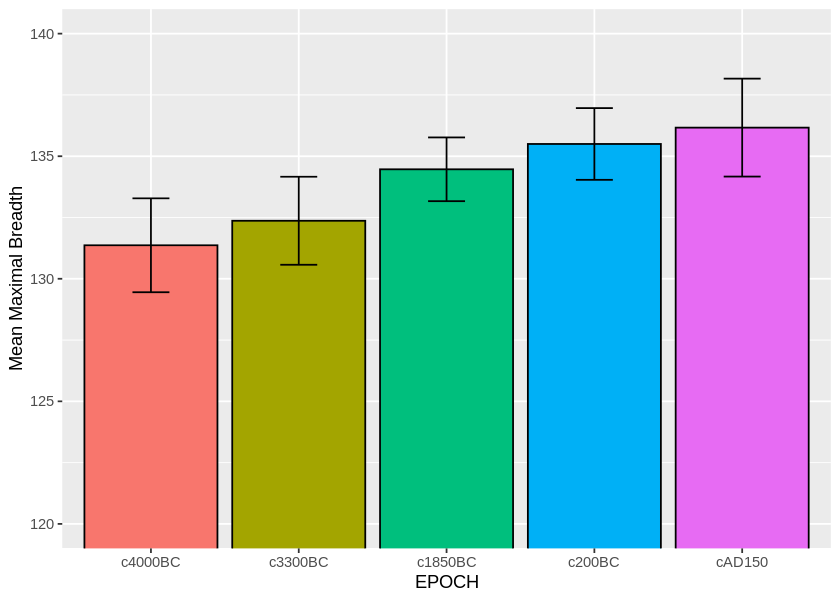

In [16]:
library(ggplot2)
library(plyr)
library(dplyr)
options(repr.plot.width = 7, repr.plot.height = 5)
plotdata = ddply(skulldata, c("epoch"), summarise,
                  n = length(mb),
                  mean = mean(mb),
                  s = sd(mb),
                  se = s/sqrt(n),
                  df = n - 1,
                  alpha = 0.05,
                  t_crit = qt(alpha/2, df = df, lower.tail = FALSE),
                  MOE = t_crit * se,
                  CI_bottom = mean - MOE,
                  CI_upper = mean + MOE

)
plotdata$epoch = factor(plotdata$epoch, levels = c('c4000BC', 'c3300BC', 'c1850BC', 'c200BC', 'cAD150' ) )
ggplot(plotdata, aes(x = epoch, y = mean)) +
  geom_bar(stat = "identity", colour = "black",aes(fill = epoch )) + 
  geom_errorbar(aes(ymin = CI_bottom,
                  ymax = CI_upper),
                  width = .25) +
  coord_cartesian(ylim = c(120, 140)) + 
  xlab("EPOCH") + 
  ylab("Mean Maximal Breadth") + 
  theme(legend.position="none")

Question 3:

In [5]:
skulldata$dum3300 = ifelse(skulldata$epoch == "c3300BC", 1, 0)
skulldata$dum1850 = ifelse(skulldata$epoch == "c1850BC", 1, 0)
skulldata$dum200 = ifelse(skulldata$epoch == "c200BC", 1, 0)
skulldata$dum4000 = ifelse(skulldata$epoch == "c4000BC", 1, 0)

In [6]:
mod1 = lm(mb ~ dum4000 + dum3300 + dum1850 + dum200, 
          data = skulldata)
mod1
mod1sum = summary(mod1)
mod1sum
# The Models formula is Y = 136.1667 - 4.8000X1 - 3.8000X2 - 1.7000X3 - 0.6667X4


Call:
lm(formula = mb ~ dum4000 + dum3300 + dum1850 + dum200, data = skulldata)

Coefficients:
(Intercept)      dum4000      dum3300      dum1850       dum200  
   136.1667      -4.8000      -3.8000      -1.7000      -0.6667  



Call:
lm(formula = mb ~ dum4000 + dum3300 + dum1850 + dum200, data = skulldata)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.3667  -2.5000   0.1667   2.6333  15.6333 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 136.1667     0.8389 162.323  < 2e-16 ***
dum4000      -4.8000     1.1863  -4.046 8.44e-05 ***
dum3300      -3.8000     1.1863  -3.203  0.00167 ** 
dum1850      -1.7000     1.1863  -1.433  0.15401    
dum200       -0.6667     1.1863  -0.562  0.57501    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.595 on 145 degrees of freedom
Multiple R-squared:  0.1411,	Adjusted R-squared:  0.1174 
F-statistic: 5.955 on 4 and 145 DF,  p-value: 0.0001826


Question 4:

The F-Statistic is 5.954513.

The degrees of Freedom is 145.

The p-value is 0.000183



Question 5:

In [7]:
# The information above tells us that the predictors are significant. 

Question 6:

In [8]:
# From the summary of the model, it is clear that there was a significant difference between 3300BC and 4000BC epochs. 

Question 7:

In [13]:
mb = skulldata$mb
# Grand Mean
gm = mean(mb)
round(gm, 3)

# sum of squares total (sst)
sst = sum((mb - gm)^2)
round(sst, 3)

# model sum of squares (ssm)
ssm = sum(plotdata$n * (plotdata$mean - gm)^2)
round(ssm, 3)

# residual sum of squares (ssr)
ssr = sst - ssm
round(ssr , 3)

# degree of freedom (total)
dftotal = 150 - 1

# degree of freedom (model)
dfmodel = 5 - 1

# model sum of squares (msm)
msm = ssm / dfmodel
round(msm, 3)

# degrees of freedom (residuals)
dfres = dftotal - dfmodel

# residual mean squares
msr = ssr / dfres
round(msr, 3)

# multiple rsquared
msq = ssm / sst
round(msq, 3)

# fstat
fstat = msm / msr
round(fstat, 6)

# pvalue
q7pval = pf(fstat, df1 = 4, df2 = 145, lower.tail = FALSE)
round(q7pval, 6)

[1] 133.973

[1] 3563.893

[1] 502.827

[1] 3061.067

[1] 125.707

[1] 21.111

[1] 0.141

[1] 5.954613

[1] 0.000183

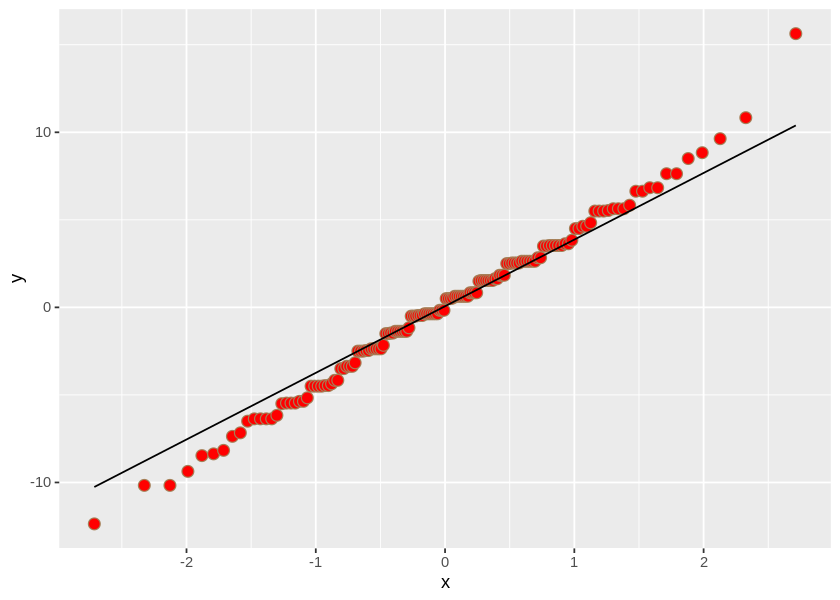

In [18]:

ggplot(skulldata, aes(sample = mod1$residuals)) +
  stat_qq(shape = 21, size = 3,
             fill = "red", colour = "#A57E56", stroke = .5) +
  stat_qq_line()
# from the qq plot below, the model does not violate the normality asusmption

Question 9:

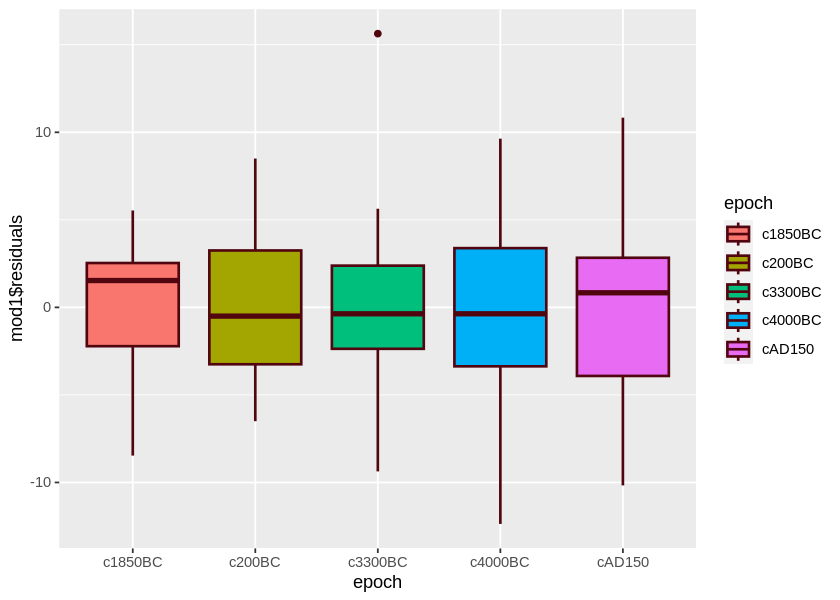

In [25]:
ggplot(skulldata, aes(x = epoch, y = mod1$residuals)) +
  geom_boxplot(aes(fill = epoch), colour = "#51050F", size = 0.75)

# from the looks of things, it does not violate the homgeneity assumption.

Question 10:

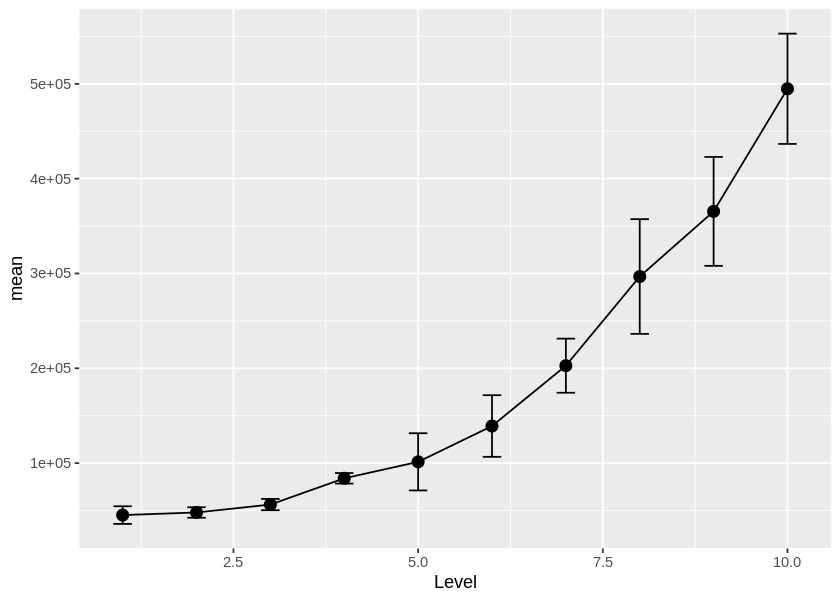

In [42]:
salary = read.csv("salary.csv")
plotdata2 = ddply(salary, c("Level"), summarise,
                  n = length(Salary),
                  mean = mean(Salary),
                  s = sd(Salary),
                  se = s/sqrt(n),
                  df = n - 1,
                  alpha = 0.05,
                  t_crit = qt(alpha/2, df = df, lower.tail = FALSE),
                  MOE = t_crit * se,
                  CI_bottom = mean - MOE,
                  CI_upper = mean + MOE

)
# plotdata2
ggplot(plotdata2, aes(x = Level, y = mean)) +
  geom_line()+
  geom_point(size = 3)+
  geom_errorbar(aes(ymin = CI_bottom,
                    ymax = CI_upper),
                    width = 0.25)
                      

In [49]:
salary$Level = factor(salary$Level)
contrasts(salary$Level) = contr.poly(levels(salary$Level))
salarymod = lm(Salary ~ Level, data = salary)
summary(salarymod)


Call:
lm(formula = Salary ~ Level, data = salary)

Residuals:
    Min      1Q  Median      3Q     Max 
-199768  -21072    -872   19437  201771 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 183386.9     5292.7  34.649   <2e-16 ***
Level.L     432933.2    16737.0  25.867   <2e-16 ***
Level.Q     164613.3    16737.0   9.835   <2e-16 ***
Level.C      20357.8    16737.0   1.216    0.226    
Level^4      -3562.0    16737.0  -0.213    0.832    
Level^5        906.9    16737.0   0.054    0.957    
Level^6      15563.9    16737.0   0.930    0.354    
Level^7      15804.0    16737.0   0.944    0.347    
Level^8        837.8    16737.0   0.050    0.960    
Level^9       4684.9    16737.0   0.280    0.780    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 60350 on 120 degrees of freedom
Multiple R-squared:  0.865,	Adjusted R-squared:  0.8549 
F-statistic: 85.47 on 9 and 120 DF,  p-value: < 2.2e-16


from the summary above, the significant trend types are the linear and the quadratic models

Question 11:

In [60]:
salary$Level = as.numeric(as.character(salary$Level))
q11mod = lm(Salary ~ Level, data = salary)
q11sum = summary(q11mod)
q11sum$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-78767.15,14992.827,-5.253656,6.044644e-07
Level,47664.38,2416.313,19.726081,1.258446e-40


the best model is gonna be Y = -78767.154 + 47664.382X1

Question 12:

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


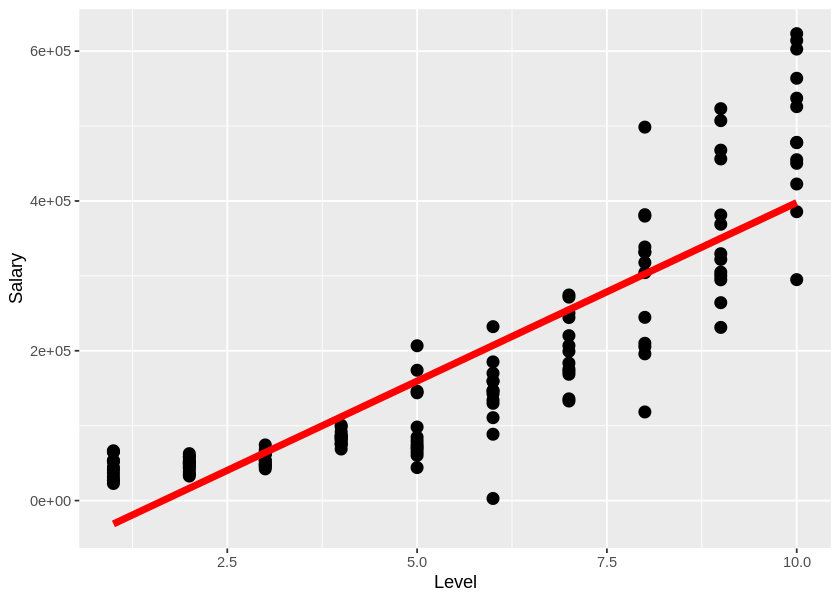

In [66]:
x = c(1,2,3,4,5,6,7,8,9,10)
y = -78767.154 + (47664.382*x)
modpreds = data.frame(x,y)
ggplot(salary, aes(x = Level, y = Salary)) + 
  geom_point(size = 3) + 
    geom_line(data = modpreds, aes(x = x, y = y),
              colour = "red", size = 2)